<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Load-and-summarize" data-toc-modified-id="Load-and-summarize-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load and summarize</a></span></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modelling</a></span></li></ul></div>

## Libraries

In [50]:
library(tidyverse)
library(mice)
library(nlme)
library(lme4)
library(lmerTest)


Attaching package: ‘lmerTest’


The following object is masked from ‘package:lme4’:

    lmer


The following object is masked from ‘package:stats’:

    step




## Load and summarize

In [51]:
df = read.csv('../data/2018-2019/postprocessed/final_for_analysis.csv', na.strings=c(""," "))
dim(df)
head(df)

[1] 204  62

,PID,NID,Age,FinclAid,FatherEd,MotherEd,FmlyIncome,Extraversion,Agreeableness,Openness,⋯,Gender_other,Race_Black.or.African.American,Race_Pacific.Islander,Race_Other,Race_American.Indian,Race_Hispanic.or.Latino.a,Race_South.Asian,Race_Middle.Eastern,Race_East.Asian,Race_White.or.Caucasian
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,vgxlTMkQs5,7,18,0,4.0,4.0,87500.0,4.0,4.0,5.5,⋯,0,0,0,0,0,0,0,0,0,1
2,M9obKkDvc0,11,18,1,3.5,3.5,115856.7,6.0,4.5,5.0,⋯,0,0,0,0,0,0,1,0,0,0
3,RdS4vMvQjo,9,18,1,4.0,4.0,125000.0,3.0,6.0,6.5,⋯,0,0,0,0,0,0,0,0,0,1
4,n08loMfJH7,4,18,0,4.0,2.5,200000.0,4.0,5.5,6.5,⋯,0,0,0,0,0,0,0,0,1,0
5,8rsekwqjFy,5,18,1,2.5,2.5,125000.0,4.5,5.0,6.0,⋯,0,0,0,0,0,0,1,0,0,0
6,FjTWohEryS,13,18,1,4.0,3.0,45000.0,4.0,4.0,6.0,⋯,0,0,0,0,0,0,0,0,1,0


In [52]:
str(df)

'data.frame':	204 obs. of  62 variables:
 $ PID                           : Factor w/ 204 levels "08JYVDNSVE","09sqjhTBY5",..: 173 118 150 122 26 69 151 68 72 3 ...
 $ NID                           : num  7 11 9 4 5 13 4 9 10 7 ...
 $ Age                           : num  18 18 18 18 18 18 18 18 18 18 ...
 $ FinclAid                      : num  0 1 1 0 1 ...
 $ FatherEd                      : num  4 3.5 4 4 2.5 4 2.5 3 3 3.5 ...
 $ MotherEd                      : num  4 3.5 4 2.5 2.5 3 2.5 2.5 3.5 3 ...
 $ FmlyIncome                    : num  87500 115857 125000 200000 125000 ...
 $ Extraversion                  : num  4 6 3 4 4.5 4 2.5 4 2 6 ...
 $ Agreeableness                 : num  4 4.5 6 5.5 5 4 6.5 4.5 5 6.5 ...
 $ Openness                      : num  5.5 5 6.5 6.5 6 6 2.5 5.5 6 7 ...
 $ Conscientiousness             : num  3.5 4.5 5 5.5 5 4 4.5 3 3.5 4.5 ...
 $ NPI                           : num  3.33 5 2.53 3 2.8 ...
 $ Positive_empathy              : num  4.14 4 3.14 3.71 4 .

In [53]:
# Should be a factor, not an int
df$NID = as.factor(df$NID)

In [54]:
tbl = df %>% group_by(NID) %>% summarise(
  Wellbeing_fall = mean(Wellbeing_fall),
  Wellbeing_spring = mean(Wellbeing_spring)
)
tbl

NID,Wellbeing_fall,Wellbeing_spring
<fct>,<dbl>,<dbl>
1,0.17958135,0.43067609
2,0.10039586,0.23049091
4,-0.04213750,0.00871215
5,0.05322856,0.01841058
7,0.06902635,0.17164150
8,-0.15094904,-0.45876161
9,-0.09749154,-0.34804765
10,-0.35117851,-0.30147326
11,0.14734051,0.15272015


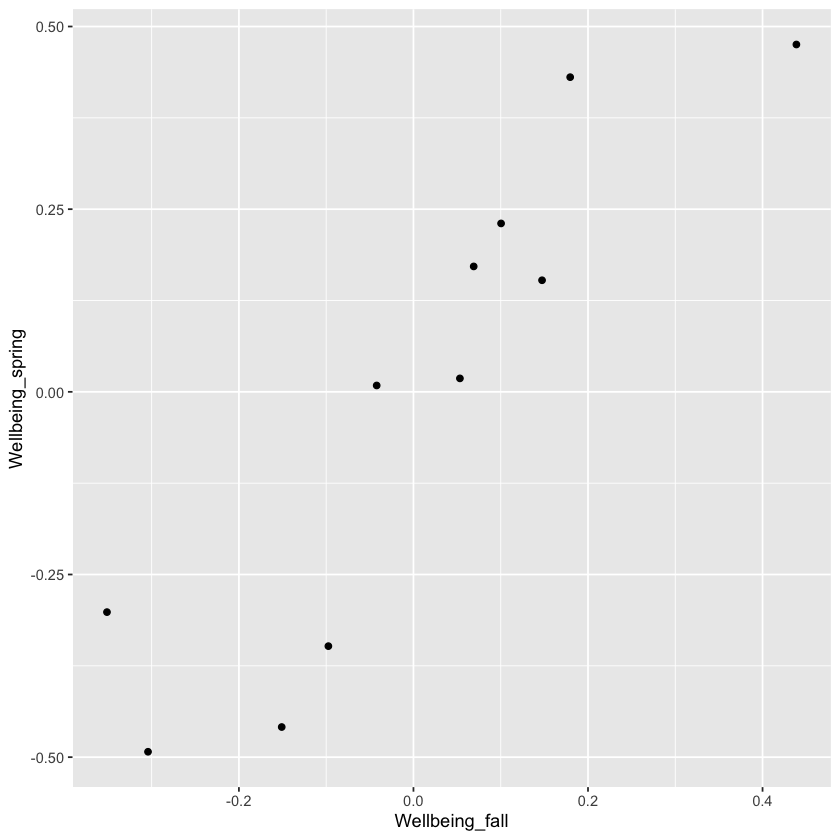

In [55]:
ggplot(tbl) +
  geom_point(aes(Wellbeing_fall, Wellbeing_spring))

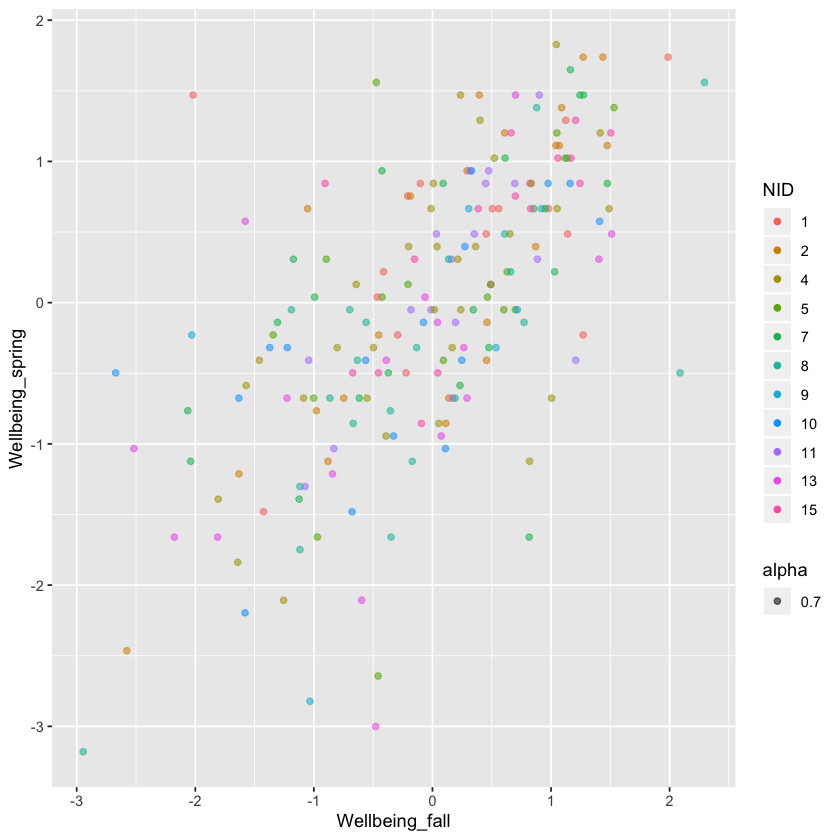

In [56]:
ggplot(df, aes(Wellbeing_fall, Wellbeing_spring, colour = NID, alpha=0.7)) +
  geom_point()

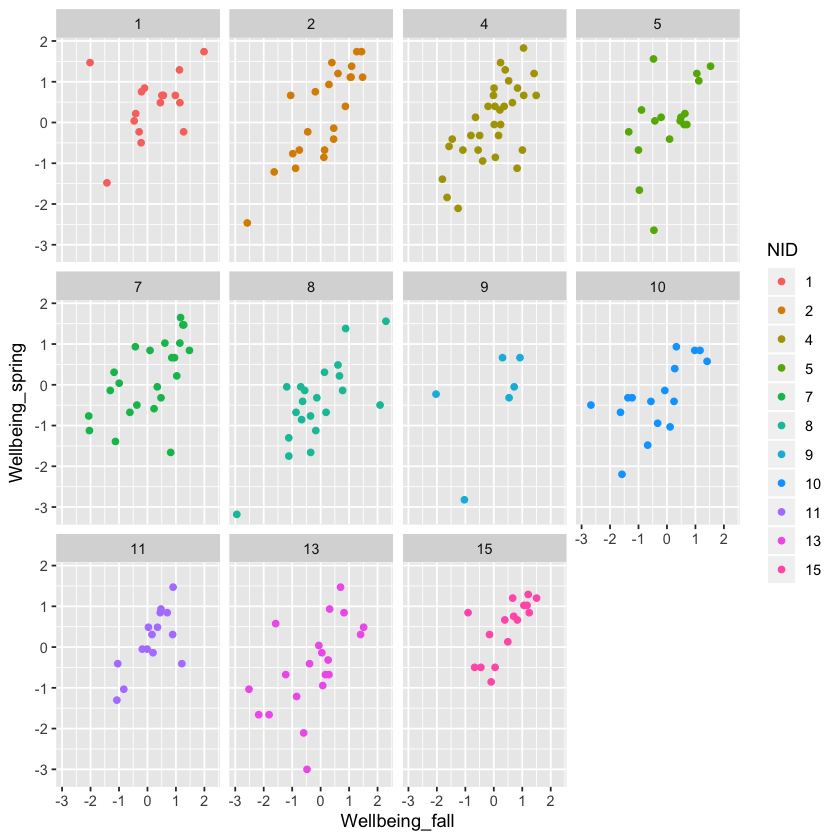

In [57]:
ggplot(df, aes(Wellbeing_fall, Wellbeing_spring, colour = NID)) +
  geom_point() +
  facet_wrap(~ NID)

## Modelling

In [58]:
model_base = lm(Wellbeing_spring ~ Wellbeing_fall, data=df)
summary(model_base)


Call:
lm(formula = Wellbeing_spring ~ Wellbeing_fall, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.69297 -0.48662  0.06646  0.49158  2.76843 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -3.286e-16  5.373e-02    0.00        1    
Wellbeing_fall  6.433e-01  5.387e-02   11.94   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7675 on 202 degrees of freedom
Multiple R-squared:  0.4139,	Adjusted R-squared:  0.411 
F-statistic: 142.6 on 1 and 202 DF,  p-value: < 2.2e-16


In [59]:
model_demos = lm(Wellbeing_spring ~ Wellbeing_fall +
                 Age + FatherEd + MotherEd + FinclAid + log10(FmlyIncome) +
                 Gender_M + Gender_other + Race_Black.or.African.American +
                 Race_Pacific.Islander + Race_Other + Race_American.Indian +
                 Race_Hispanic.or.Latino.a + Race_South.Asian +
                 Race_Middle.Eastern + Race_East.Asian + Race_White.or.Caucasian,
                 data=df)
summary(model_demos)


Call:
lm(formula = Wellbeing_spring ~ Wellbeing_fall + Age + FatherEd + 
    MotherEd + FinclAid + log10(FmlyIncome) + Gender_M + Gender_other + 
    Race_Black.or.African.American + Race_Pacific.Islander + 
    Race_Other + Race_American.Indian + Race_Hispanic.or.Latino.a + 
    Race_South.Asian + Race_Middle.Eastern + Race_East.Asian + 
    Race_White.or.Caucasian, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.49248 -0.45109  0.02121  0.41169  2.55394 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    -0.973960   1.288547  -0.756 0.450690    
Wellbeing_fall                  0.579793   0.056960  10.179  < 2e-16 ***
Age                            -0.006318   0.052886  -0.119 0.905043    
FatherEd                        0.154233   0.109820   1.404 0.161861    
MotherEd                       -0.210859   0.104546  -2.017 0.045144 *  
FinclAid                       -0.044093   0.133077  -0.331 0

In [71]:
model_dorm = lmer(Wellbeing_spring ~ Wellbeing_fall +
                 Age + FatherEd + MotherEd + FinclAid + log10(FmlyIncome) +
                 Gender_M + Gender_other + Race_Black.or.African.American +
                 Race_Pacific.Islander + Race_Other + Race_American.Indian +
                 Race_Hispanic.or.Latino.a + Race_South.Asian +
                 Race_Middle.Eastern + Race_East.Asian + Race_White.or.Caucasian +
                 (1 | NID),
                 data=df, REML = FALSE)
summary(model_dorm)


Correlation matrix not shown by default, as p = 18 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: Wellbeing_spring ~ Wellbeing_fall + Age + FatherEd + MotherEd +  
    FinclAid + log10(FmlyIncome) + Gender_M + Gender_other +  
    Race_Black.or.African.American + Race_Pacific.Islander +  
    Race_Other + Race_American.Indian + Race_Hispanic.or.Latino.a +  
    Race_South.Asian + Race_Middle.Eastern + Race_East.Asian +  
    Race_White.or.Caucasian + (1 | NID)
   Data: df

     AIC      BIC   logLik deviance df.resid 
   478.6    545.0   -219.3    438.6      184 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.4490 -0.6785  0.0452  0.5438  3.5405 

Random effects:
 Groups   Name        Variance Std.Dev.
 NID      (Intercept) 0.01823  0.1350  
 Residual             0.48892  0.6992  
Number of obs: 204, groups:  NID, 11

Fixed effects:
                                Estimate Std. Error        df t value Pr(>|t|)
(Intercept)                     -1.52810    1.

In [72]:
dev0 <- -2*logLik(model_demos)
dev1 <- -2*logLik(model_dorm)
devdiff <- as.numeric(dev0-dev1); devdiff

[1] 0.8543505

In [73]:
dfdiff <- attr(dev1,"df")-attr(dev0,"df"); dfdiff

[1] 1

In [74]:
cat('Chi-square =', devdiff, '(df=', dfdiff,'), p =', 
  pchisq(devdiff,dfdiff,lower.tail=FALSE))

Chi-square = 0.8543505 (df= 1 ), p = 0.3553245

In [75]:
AIC(model_demos, model_dorm)

,df,AIC
,<dbl>,<dbl>
model_demos,19,477.4850
model_dorm,20,478.6307
